#**Part03. 케라스(Keras)**

#**01. 딥러닝 준비**
케라스의 목적 : 딥러닝 라이브러리를 간결한 코드로 실행할 수 있게 만들어주는 것
- 2.4버전 이후부터는 텐서플로만 지원

##**1-1 주요 용어**

### **1-1-1 하이퍼파라미터(hyper-parameter)**
**하이퍼파라미터** : 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때사용자가 직접 설정해주는 설정값을 뜻함
- 가중치(weights), 편향(bias)은 자동 업데이트
- 학습 속도나 반복 훈련 횟수 등의 하이퍼파라미터는 사용자가 직접 설정

**튜닝(tuning)** : 하이퍼파라미터 값을 조절하는 것


###**1-1-2 과소적합 vs 과대적합(underfitting vs overfitting)**

머신러닝 학습에 있어 데이터는 크게 훈련용 데이터와 예측용 데이터로 구분할 수 있다.
- 훈련용 데이터(training set) : 머신러닝 모델이 학습할 데이터
- 예측용 데이터(test set) : 정답 레이블이 없는 머신러닝 모델이 예측해야 하는 대상 데이




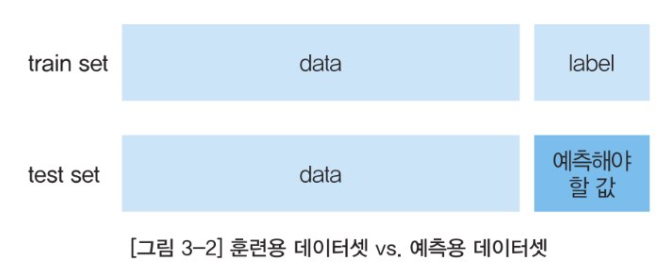

예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어진 경우 예측 성능이 떨어진다.

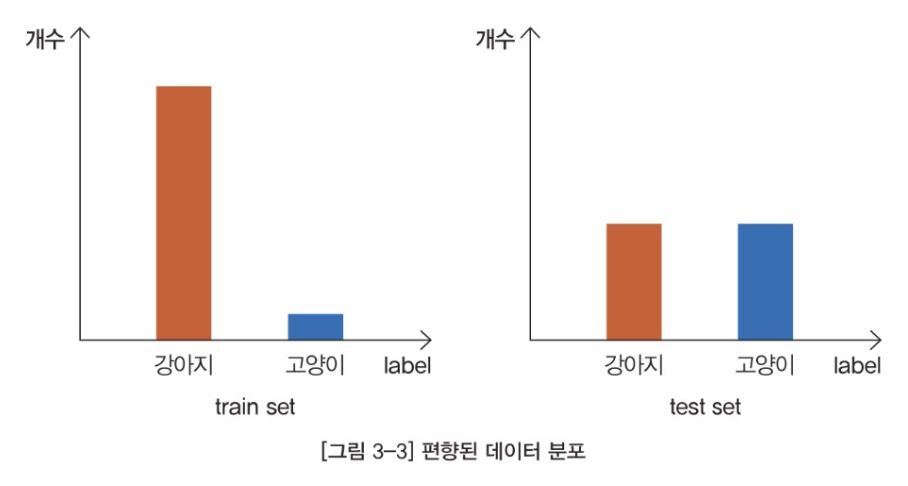

- 과소적합 : 모델이 충분히 학습되지 않은 경우
- 과대적합 : 학습데이터를 지나치게 반복 학습하게 되어 과하게 적합된 상태

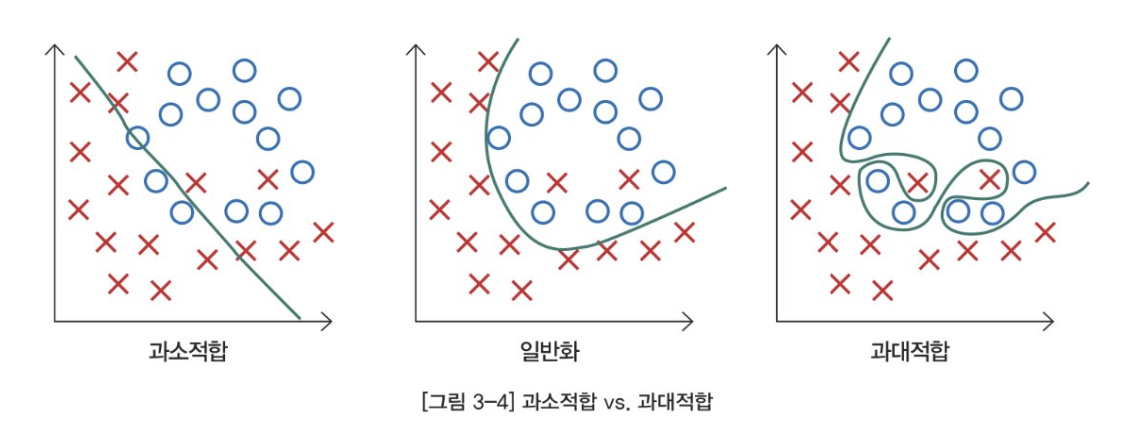

모델을 학습시킬 때 유의할 점
- 과소적합과 과대적합 문제를 최소화한다.
- 훈련 데이터를 잘 구성해야 한다.
  - 예측 데이터와 분포가 동일하게 구성
  - 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함
  - 훈련 데이터의 일부를 검증 데이터로 활용하여 검증 성능이 가장 좋은 구간을 모델의 가장 이상적으로 학습된 지점이라 판단

###**1-1-3 에포크(epoch)**
**1 epoch** : 딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프(loop)
- 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료된다.


###**1-1-4 손실함수(loss function)**
**손실함수** : 예측 값과 정답 값의 차이 또는 오차(Error)

지도학습의 분류 문제
- 이진 분류 : `binary_crossentropy`
  - 출력층의 활성화함수가 'sigmoid'인 경우
- 다중 분류 : `categorical_crossentropy`, 다중분류의 대상이 되는 클래스가 one-hot-vector인 경우 사용
  - `sparse_categorical_crossentropy` : 정답 클래스가 레이블로 표현되어 서로 다른 숫자로 구분되어 있는 경우
  - 출력층의 활성화함수로 'softmax'사용

회귀모델
- 평균제곱오차(Mean Squared Error), 평균 절대값오차(Mean Absolute Error), 후버(Huber) 등 사용

텐서플로는 사전 정의된 손실함수를 함수형(Functional API)과 클래스형(Subclassing)으로 제공한다.

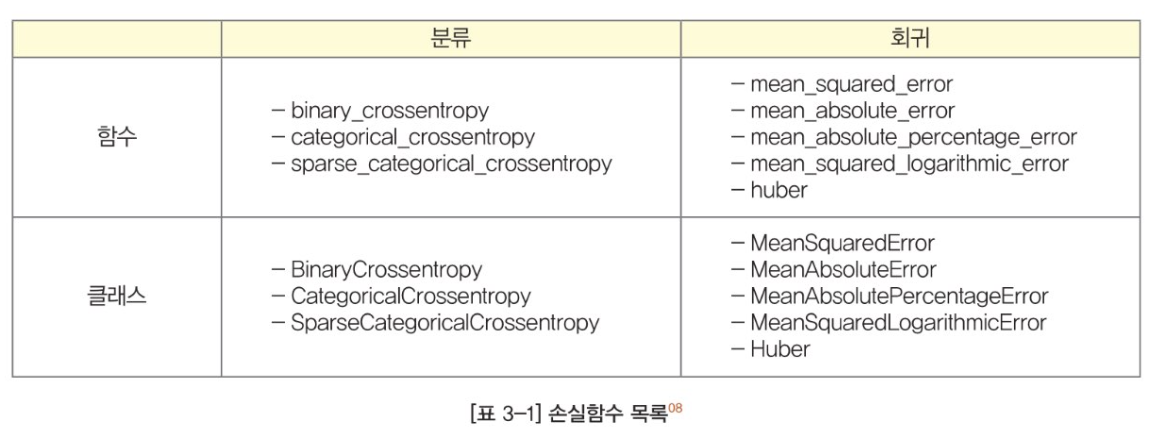

In [1]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

###**1-1-5 경사하강법(gradient descent)**
경사하강법 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고 목적함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

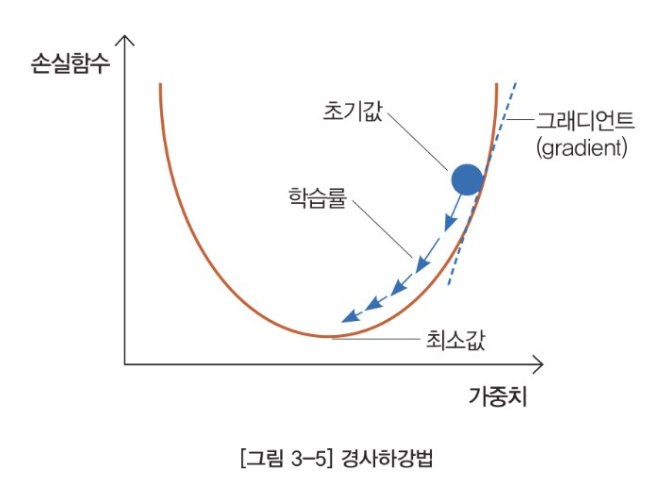

딥러닝 훈련 프로세스에서 경사하강법 알고리즘을 적용하여 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

> 경사하강법을 넘파이로 구현


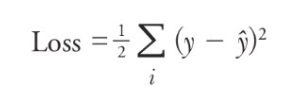

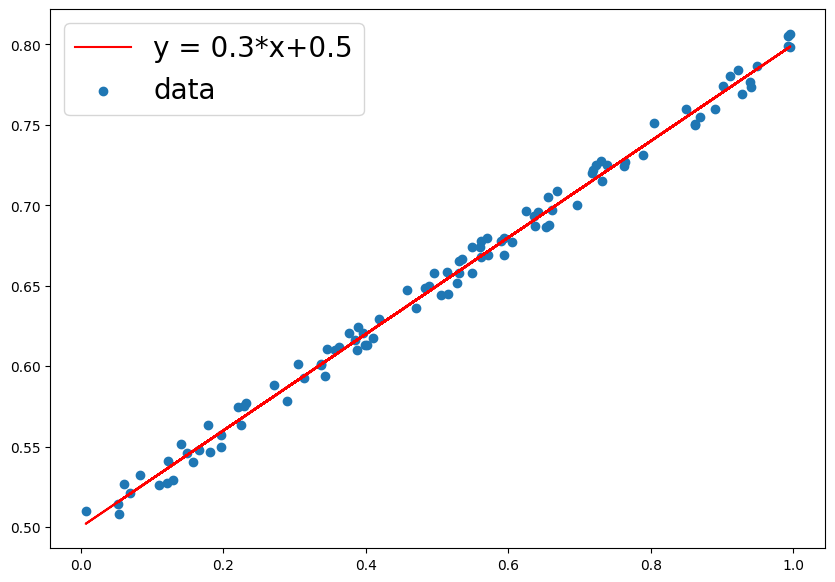

w:0.3, b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size = y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize = 20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y = make_linear(w=0.3, b= 0.5, size=100, noise=0.01)

w, b에 대한 그래디언트 구하기


In [3]:
#최대 반복 횟수
num_epoch = 1000

#학습률(learning rate)
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  #Hypothesis 정의
  y_hat = w * x + b

  #Loss Function 정의
  error = 0.5*((y_hat - y)**2).sum()
  if error < 0.005:
    break
  #Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y)*x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0 :
    print('{0:2}w={1:.5f}.b={2:.5f} error={3:.5f}'.format(epoch,w,b,error))

print("-----"*15)
print('{0:2}w={1:.5f}.b={2:.5f} error={3:.5f}'.format(epoch,w,b,error))

 0w=0.61466.b=0.31935 error=0.44147
 5w=0.57659.b=0.35080 error=0.29838
10w=0.53970.b=0.37083 error=0.22465
15w=0.50769.b=0.38815 error=0.16926
20w=0.47996.b=0.40316 error=0.12766
25w=0.45592.b=0.41617 error=0.09641
30w=0.43508.b=0.42744 error=0.07294
35w=0.41703.b=0.43721 error=0.05531
40w=0.40138.b=0.44568 error=0.04207
45w=0.38782.b=0.45302 error=0.03213
50w=0.37606.b=0.45938 error=0.02466
55w=0.36588.b=0.46489 error=0.01904
60w=0.35705.b=0.46967 error=0.01483
65w=0.34940.b=0.47381 error=0.01166
70w=0.34277.b=0.47740 error=0.00929
75w=0.33702.b=0.48051 error=0.00750
80w=0.33204.b=0.48320 error=0.00616
85w=0.32772.b=0.48554 error=0.00515
---------------------------------------------------------------------------
86w=0.32772.b=0.48554 error=0.00498


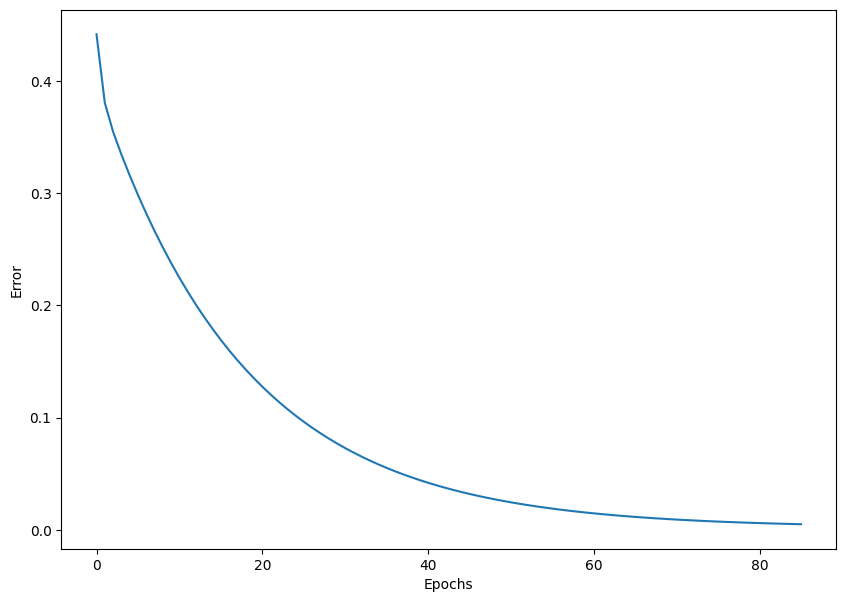

In [4]:
plt.figure(figsize = (10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel('Error')
plt.show()

##**1-2 딥러닝 프로세스**
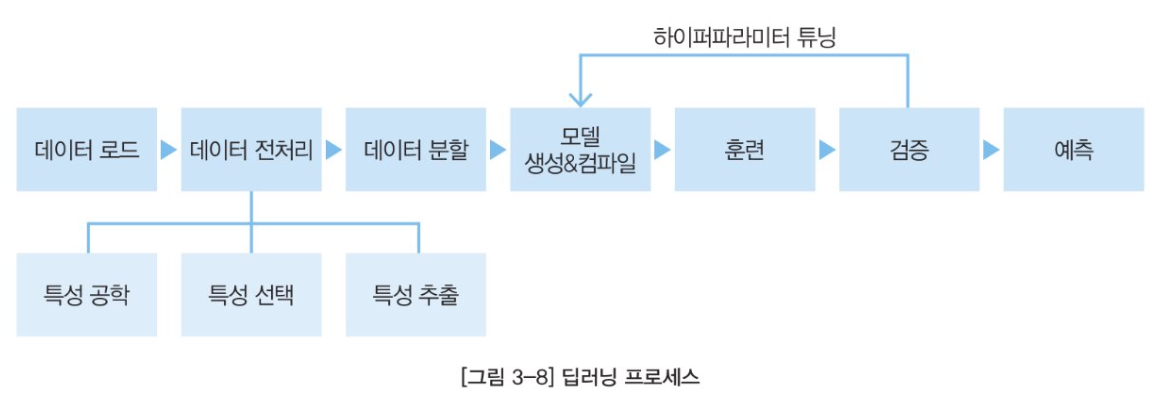

필수 프로세스 : 데이터 전처리, 모델의 생성, 컴파일, 훈련
- 예측 : 예측용 데이터셋을 입력하여 모델 예측 값을 얻는 과정
- 검증 : 모델의 성능을 평가하는 단계

### **1-2-1 데이터 전처리**

데이터를 모델에 주입하기 전 가공하는 단계
- 차원 변경, 스케일 조정

### **1-2-2 모델 생성**
모델의 구조를 정의하고 생성하는 단계
- Sequential API, Functional API, Model Subclassing

###**1-2-3 모델 컴파일**
생성된 모델 훈련에 사용할 손실함수(loss), 옵티마이저(optimizer), 평가지표(metrics) 등을 정의
- 모델 인스턴스에 compile()메소드를 적용하고, 앞에서 열거한 여러가지 속성 값을 설정

###**1-2-4 모델 훈련**
fit() 함수에 훈련에 필요한 정보를 매개변수(또는 파라미터)로 전달한다.
- 훈련 데이터셋, 검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등을 지정

###**1-2-5 모델 검증**
모델을 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델의 예측 값을 정답과 비교하여 평가지표를 계산한다. 목표 성능에 도달할 때 까지 반복한다.

###**1-2-6 모델 예측**
훈련과 검증이 완료된 모델로 테스트셋에 대하여 모델이 예측하고 그 결과를 반환한다.

#**02. 단순 신경망 훈련**


##**2-1 선형회귀**
회귀분석이란 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법이다.
- 단순 선형 회귀(simple linear regression) 모형은 하나의 X가 Y에 미치는 영향을 추정하며 1차 함수 관계로 나타낼 수 있다.
```
y = ax + b
```



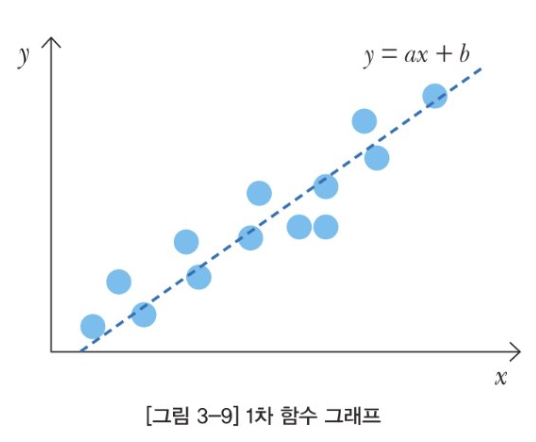

텐서플로 케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습한다.
- 모델은 1차 함수식과 동일함
- 모델의 기울기 a와 절편 b를 업데이트하면서 종속변수 Y에 가장 근사한 1차 함수식을 완성해나간다.


```
y = wx + b

w :가중치(weight)
b : 편향(bias)
```



##**2-2 뉴런(Neuron)**
뉴런은 인공 신경망 모델을 구성하는 하나의 신경을 의미한다.
- 뉴런은 노드(node)라고도 불림
- 신경망은 여러개의 레이어(layer)를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨
- 뉴런 내부에 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨
> 역전파(back propagation) 알고리즘 : 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법, 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력층 순으로 역으로 계산하고 저장한다.

##**2-3 Dense 레이어**
Dense 레이어 : 심층 신경망 모델을 구성하는 가장 기본 레이어
- 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있기 때문에, 완전 연결층(Fully Connected Layer)이라고 부르기도 함



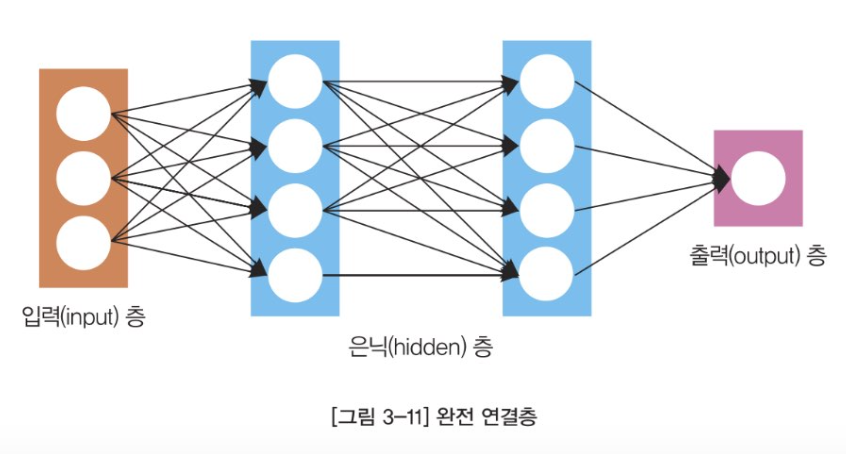

- 입력 레이어 1개, 은닉 레이어 2개, 출력 레이어 1개로 구성
- 각 레이어는 1개 이상의 뉴런으로 구성
- 입력 레이어는 3개의 뉴런이 있고, 출력 레이어는 1개의 뉴런을 가짐
- 모든 뉴런들이 텐서의 흐름을 나타내는 화살표로 연결되어 있어서 완전 연결층이라고 정의



```
Dense 레이어
- 첫번째 위치 인자 : 노드의 개수
- activation 매개변수 : 활성화 함수 지정하여 적용
```



In [5]:
import tensorflow as tf

#10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화함수 적용
tf.keras.layers.Dense(10, activation='relu')

##**2-4 데이터셋 만들기**
단순선형회귀모형을 지도학습 방식으로 훈련하기 위해 x, y 데이터 생성


In [6]:
#샘플 데이터셋 생성
x = np.arange(1,6)

#y=3x+2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


생성한 데이터를 matplotlib 시각화 라이브러리를 활용하여 그래프 출력

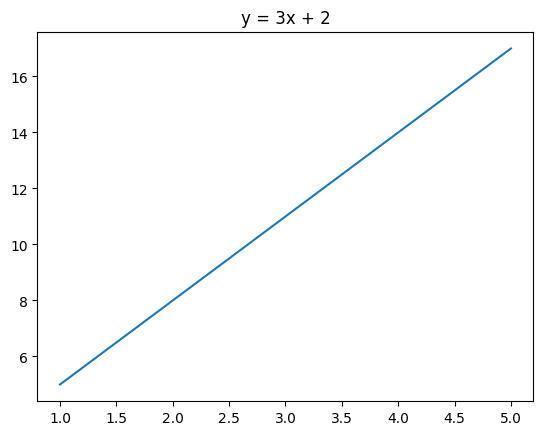

In [7]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

##**2-5 Sequential API**
텐서플로 케라스는 세 가지 방식으로 모델 생성 가능
- Sequential API : 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
  - 입력 레이어부터 출력 레이어까지 순서를 갖는다.
  - 입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행

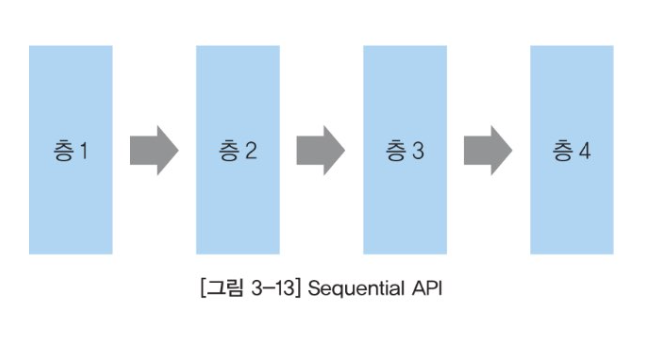

직관적으로 구조를 이해할 수 있으므로 가장 간단한 방법, 하지만 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조를 만들 수 없다.
-> Functional API 사용

###**2-5-1 모델 구조**
**1. 리스트형 정의**

Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층을 입력한다.

In [8]:
import tensorflow as tf

#리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

**2. add 함수**
add 함수로 레이어 추가로 Sequential 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식
- add() 메소드 함수를 사용하여 1개의 층을 추가
- 여러 개의 층을 추가하려면 add 함수를 반복해서 여러 번 사용

In [9]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

###**2-5-2 입력 데이터 형태**
Sequential API를 사용하여 모델을 구성할 때 첫번째 층은 input_shape 매개변수를 지정해야 한다.
- input_shape : 데이터셋의 shape을 튜플 혹은 리스트로 지정
- (150,4)인 경우 150개 샘플에 대해 4개의 입력변수 존재, `(4,) or [4]` 로 지정

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    #입력 데이터의 Shape = (150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

###**2-5-3 단순선형회귀 모델 정의**
1개의 뉴런을 가지는 Dense레이어 하나를 사용
- 1개의 뉴런은 기울기에 해당하는 w, 상수항에 해당하는 b를 매개변수로 가짐
- 1차 함수식 y=wx+b에서 입력 데이터는 x값을 나타내는 입력 변수 1개만 존재하므로 input_shape=[1]
- 1개의 뉴런을 가지는 Dense 레이어는 1개의 출력 값을 가지므로 출력 값은 y에 대한 모델의 예측 값

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

##**2-6 모델 요약**
model.summary() : 모델의 요약 내용을 확인
- 모델 구조, 층별 노드의 개수라 표기됨
- 하단에는 훈련 시 업데이트할 파라미터의 개수 표기

In [12]:
#모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- `total params` : 모델 내부에 존재하는 모든 파라미터의 합계
  - 단순선형회귀모델의 경우 가중치와 편향 2개
- `trainable params` : 모델 훈련 시 업데이트할 파라미터 총 개수
- `non-trainable params` : 훈련 시 업데이트하지 않을 파라미터의 총 개수

##**2-7 컴파일**
모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 등을 정의
- 3가지 방법으로 지정가능
  - `클래스 인스턴스` : 학습률(learning rate), 모멘텀(momentum) 등의 하이퍼파라미터를 사용자가 직접 정의할 수 있음
  - `함수`
  - `사전 정의된 문자열` : 기본값으로 설정된 하이퍼파라미터 사용, 수정이 어려움

In [13]:
# 긴 문자열 지정
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mean_squared_error','mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics =['mse','mae'])

In [15]:
# 클래스 인스턴스 지정
model.compile(optimizer =tf.keras.optimizers.SGD(lr=0.005),
              loss = tf.keras.losses.MeanAbsoluteError(),
              metrics = [tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.MeanSquaredError()])

**단순선형회귀 모델 훈련**
- **옵티마이저** : 확률적 경사하강법(Stochastic Gradient Descent)알고리즘인 'sgd'
- **손실함수** : 평균제곱오차(Mean Squared Error)인 'mse'
- **평가지표** : 평균절대오차(Mean Absolute Error)인 'mae'

In [16]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## **2-8 훈련**
`fit()` : 가중치(weight) 텐서를 업데이트하는 과정
- 훈련용 데이터셋의 입력(x), 정답에 해당하는 출력(y), 반복훈련할 epoch 수를 지정
- 매 epoch가 끝날 때마다 훈련데이터셋에 대한 손실과 평가지표를 출력
  - verbose=0 옵션을 지정하면 훈련 중간 과정을 출력하지 않음
- fit() 메소드에 검증 데이터셋(validation_data) 옵션을 지정했다면 검증 셋에 대한 손실과 평가지표도 함께 출력

In [17]:
# 훈련
model.fit(x,y,epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 188.0078 - mae: 12.7422
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 109.6271 - mae: 9.7641
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 63.9503 - mae: 7.4905
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 37.3317 - mae: 5.7548
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 21.8193 - mae: 4.4296


epoch를 늘려서 추가 학습을 하면 손실을 낮출 수 있다. (과소적합 상태)

In [18]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss = 'mse', metrics=['mae'])

# 훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 415ms/step - loss: 66.6327 - mae: 7.7068
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 38.9701 - mae: 5.9372
Epoch 3/1200
1/1 [==============================] - 0s 12ms/step - loss: 22.8488 - mae: 4.5861
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 13.4531 - mae: 3.5545
Epoch 5/1200
1/1 [==============================] - 0s 10ms/step - loss: 7.9768 - mae: 2.7669
Epoch 6/1200
1/1 [==============================] - 0s 12ms/step - loss: 4.7846 - mae: 2.1654
Epoch 7/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.9234 - mae: 1.7060
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.8379 - mae: 1.3552
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 1.2044 - mae: 1.0872
Epoch 10/1200
1/1 [==============================] - 0s 10ms/step - loss: 0.8344 - mae: 0.8825
Epoch 11/1200
1/1 [==============================] - 0

`history` : epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장됨

충분한 epoch동안 훈련 후 mse, mae 모두 개선됨

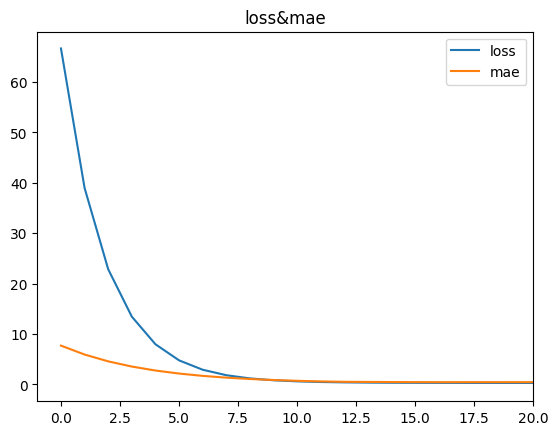

In [20]:
import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('loss&mae')
plt.legend()
plt.show()

첫 10 epoch까지 손실이 급격히 감소하는 것을 확인
- 10 epoch를 넘어가면 감소 폭이 둔화되면서 조금씩 감소하는 것을 확인

##**2-9 검증**
모델 인스턴스의 `evaluate()` 메소드로 모델의 성능을 검증, 검증 데이터셋을 입력하여 검증

In [21]:
# 검증
model.evaluate(x,y)

1/1 [==============================] - 0s 238ms/step - loss: 1.0055e-04 - mae: 0.0086


[0.00010055299935629591, 0.008606815710663795]

모델이 훈련을 마친 상태에서의 가중치를 그대로 적용하여 손실과 평가지표 계산
- 별도의 데이터셋을 검증용으로 활용하는 방법 : 교차 검증(cross-validation)
  - 홀드아웃(Hold-out), K-Fold 교차 검증

##**2-10 예측**
훈련이 완료된 모델 인스턴스의 `predict()`메소드에 새로운 입력 데이터를 넣어 주면 모델의 예측 값을 얻을 수 있음

In [22]:
# 예측
model.predict([10])

1/1 [==============================] - 1s 560ms/step


array([[32.041595]], dtype=float32)

x 인자에 해당하는 값으로 숫자 10을 입력 -> 예측 결과 y는 32에 근사하다.